<a href="https://colab.research.google.com/github/SarwarSaif/Learn-PyTorch/blob/main/Linear_Regression_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

> Steps for Linear Regression:
> 1. Design model (input, output size, forward pass)
> 2. Construct loss and optimizer
> 3. Training loop
>  - forward pass: compute prediction
>  - backward pass: gradients
>  - update weights

In [2]:
# Import Librairies
import torch 
import torch.nn as nn # get neural network module
import numpy as np # for data transformation
from sklearn import datasets # for regression datasets
import matplotlib.pyplot as plt # to plot the data

In [41]:

# (1) prepare our dataset
# Create a sample regression dataset using sklearn datasets
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=2, random_state=2)
print(f"Shape & Type of X: {X_numpy.shape, type(X_numpy)}, y: {y_numpy.shape, type(y_numpy)}")

# Convert numpy intp tensor to feed into pytorch nn
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # reshape the y into a column vector to feed as feature vector

n_samples, n_features = X.shape

# (2) Build linear regression model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

# (3) Set our Loss and Optimizer
learning_rate = 0.01
loss = nn.MSELoss() # Callable Loss Function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# (4) Training Loop
num_epochs = 1000
for epoch in range(num_epochs):
  # forward pass
  y_pred = model(X)

  # backward pass
  l = loss(y_pred, y) # calculate loss
  l.backward() # calculate gradients

  # update weights 
  optimizer.step()

  # clear gradients
  optimizer.zero_grad()

  if epoch % 100 == 0:
    [w, b] = model.parameters() # unpack the parameters
    print(f"epoch {epoch+1}: w={w[0][0].item(): .3f}, loss = {l:.8f}")

# Calculate RMSE 
def rmse(y, y_hat):
    if y_hat is None:
        return
    return torch.sqrt(torch.mean(torch.square(y_hat - y)))

y_pred = model(X)
print(f"RMSE: {rmse(y, y_pred)}")
# Claculate Residuals
resid = torch.sub(y_pred, y)
#print(resid)

Shape & Type of X: ((100, 1), <class 'numpy.ndarray'>), y: ((100,), <class 'numpy.ndarray'>)
epoch 1: w= 0.541, loss = 4086.72900391
epoch 101: w= 53.720, loss = 57.07466125
epoch 201: w= 59.749, loss = 4.35281515
epoch 301: w= 60.468, loss = 3.50753307
epoch 401: w= 60.558, loss = 3.49139738
epoch 501: w= 60.570, loss = 3.49105358
epoch 601: w= 60.571, loss = 3.49104667
epoch 701: w= 60.572, loss = 3.49104619
epoch 801: w= 60.572, loss = 3.49104643
epoch 901: w= 60.572, loss = 3.49104619
RMSE: 1.8684340715408325


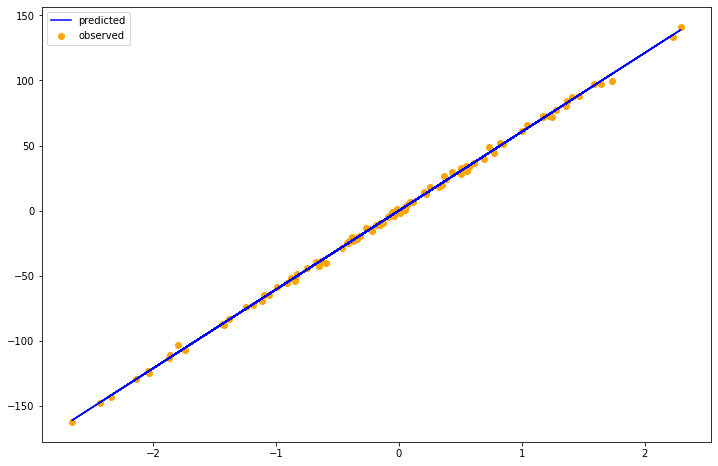

In [40]:
# Plot
# define figure 
fig = plt.figure(figsize=(12, 8)) 
ax = fig.add_subplot(111) 
# To Plot the predicted value we need to detach the gradient history function from the tensor
y_pred = model(X).detach().numpy() # remove 'grad_fn' and convert to numpy
#plt.plot(X_numpy, y_numpy, 'ro')
ax.scatter(X_numpy, y_numpy, color='orange', label="observed")
ax.plot(X_numpy, y_pred, 'b', label="predicted")
plt.legend()
plt.show()